In [3]:
import sys
sys.path.append("/users/munozr/mycodes")
sys.path.append("/Users/robynmunoz/mycodes")
sys.path.append("/Users/rlm36AA/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import Amplitudes as A

In [4]:
np.sqrt(3)

1.7320508075688772

In [9]:
# sin
params = {'Amp_pertx': 0.0,
          'Amp_perty': 0.0,
          'Amp_pertz': 0.0,
          'lambda_pertx':0.0, 
          'lambda_perty':0.0, 
          'lambda_pertz':0.0}
# exp 
params = {'ICPertFLRW_exp_amplitude': -1e-8,
          'ICPertFLRW_steepness_x': 1, 
          'ICPertFLRW_steepness_y': 1, 
          'ICPertFLRW_steepness_z': 1,
          'ICPertFLRW_variance_x': 2,
          'ICPertFLRW_variance_y': 2,
          'ICPertFLRW_variance_z': 2}

ti = 1
L = 30
N = 100
output = A.f_Amp(ti, [L]*3, N, params, inhom='exp', expansion='EdS')

exp


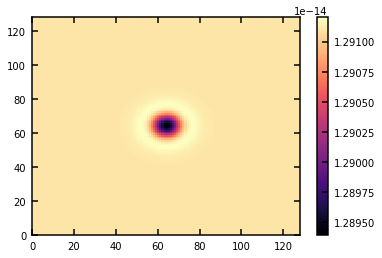

In [3]:
plt.pcolor(output['gdet'][:,:, int(N/2)])
plt.colorbar()

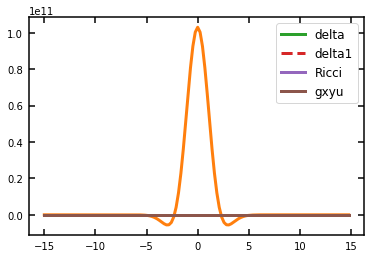

In [8]:
idOD = int(N/2)
x = np.arange(-L/2, L/2, L/N)
#plt.plot(x, output['Rc'][:,idOD,idOD])
plt.plot(x, output['gdet'][:,idOD,idOD])
plt.plot(x, 1/output['gdet'][:,idOD,idOD] - 1/output['gdet'][0,idOD,idOD])
plt.plot(x, output['delta'][:,idOD,idOD], label='delta')
plt.plot(x, output['delta1'][:,idOD,idOD], linestyle='--', label='delta1')
plt.plot(x, output['RicciScalar'][:,idOD,idOD], label='Ricci')
#plt.plot(x, output['gxxu'][:,idOD,idOD]-output['gxxu'][0,idOD,idOD], label='gxxu')
plt.plot(x, output['gxyu'][:,idOD,idOD], label='gxyu')
#. plt.plot(x, output['R2'][:,idOD,idOD], label='R2')
#plt.plot(x, output['R3'][:,idOD,idOD], label='R3')
#plt.plot(x, output['R4'][:,idOD,idOD], label='R4')
#plt.plot(x, output['K_L'][:,idOD,idOD]-output['K_L'][0,idOD,idOD], label='K')
#plt.plot(x, output['KijKji'][:,idOD,idOD]-output['KijKji'][0,idOD,idOD], label='KijKji')
plt.legend()

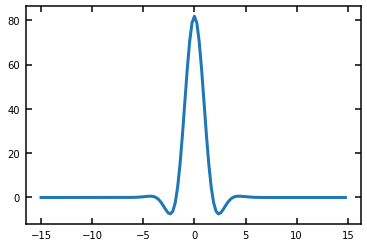

In [11]:
plt.plot(x, output['R1'][:,idOD,idOD], label='R1')


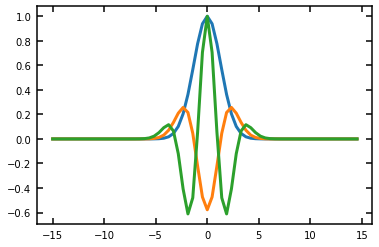

In [42]:
tsteepx = 2
expfacx = (- 1/2) * (3**(1/4)) ** (- tsteepx)

xts = x ** tsteepx
dxxts = tsteepx * (x ** (tsteepx - 1))
dxdxxts = tsteepx * (tsteepx - 1) * (x ** (tsteepx - 2))
dxdxdxxts = 0
dxdxdxdxxts = 0

expx = np.exp( expfacx * xts)
dxexpx = expfacx * dxxts * expx
dxdxexpx = expfacx * (dxdxxts * expx + dxxts * dxexpx)
dxdxdxexpx = expfacx * (dxdxdxxts * expx + 2 * dxdxxts * dxexpx + dxxts * dxdxexpx)
dxdxdxdxexpx = expfacx * (dxdxdxdxxts * expx + 3 * dxdxdxxts * dxexpx    
                            + 3 * dxdxxts * dxdxexpx + dxxts * dxdxdxexpx)

plt.plot(x, expx)
plt.plot(x, dxdxexpx)
plt.plot(x, dxdxdxdxexpx)